**PROJECT TITLE**

Flood Occurrence Classification Model using Machine Learning

**PROBLLEM STATEMENT**

Flooding is a significant global natural disaster that results in substantial loss of life, displacement of populations, infrastructure damage, and economic hardship. The inability to accurately predict flood events in advance hinders effective disaster management and response efforts. This project aims to develop a predictive modeling framework using historical data to proactively identify areas susceptible to flooding, thereby enabling timely warnings and mitigation strategies to minimize the impact of future flood occurrences.

**SOLUTION**

This project employs a supervised machine learning approach to classify geographical areas into high-risk (flood occurred) or low-risk (no flood occurred) categories. The solution involves developing and comparing the performance of three distinct classification algorithms: Logistic Regression, 
Random Forest, and Gradient Boosting (e.g., XGBoost)

The final solution will be evaluated using the folloaing evaluation performance metrics: Accuracy, Precision, Recall, and F1-score, to select the most effective model for deployment.

**DATASET DESCRIPTION**

The dataset used for this project was sourced from Kaggle, and contains 14 features that describe various environmental and geographical factors relevant to flood prediction. 

* **Latitude**: The geographical north-south coordinate of the location.
* **Longitude**: The geographical east-west coordinate of the location.
* **Rainfall (mm)**: Total rainfall recorded in millimeters.
* **Temperature (°C)**: Average temperature in degrees Celsius.
* **Humidity (%)**: Level of moisture in the air as a percentage.
* **River Discharge (m³/s)**: The volume of water flowing in a river per second.
* **Water Level (m)**: The current height of water relative to a baseline.
* **Elevation (m)**: The height of the land above sea level.
* **Land Cover**: Type of terrain (e.g., Forest, Agricultural, Desert, Water Body).
* **Soil Type**: The composition of the ground (e.g., Clay, Peat, Loam, Sandy).
* **Population Density**: Number of people per unit area.
* **Infrastructure**: A binary indicator (1 or 0) possibly indicating presence of flood defense.
* **Historical Floods**: A binary indicator (1 or 0) denoting past flood events at the location.
* **Flood Occurred**: Target Variable: A binary indicator (1 or 0) where 1 signifies a flood occurred and 0 signifies no flood occurred.

**IMPORTING LIBRARIES**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
# Load dataset
df = pd.read_csv("flood_risk_dataset_india.csv")

In [100]:
# Checking the first 5 rows
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465434,Water Body,Clay,7276.742184,1.0,0.0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0.0,1.0,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1.0,1.0,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1.0,1.0,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1.0,0.0,0


In [102]:
# Checking the last 5 rows
df.tail()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1.0,0.0,1
9999,14.297072,72.995680,77.219394,29.622711,88.936537,2614.166967,0.991856,8381.595028,Desert,Clay,4530.770301,1.0,1.0,1
10000,9.311591,83.276298,273.864524,32.369090,55.264638,2146.155567,2.855264,8263.959333,Desert,Sandy,6278.154917,0.0,0.0,1
10001,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1.0,0.0,1
10002,21.662200,70.595955,47.477868,31.774465,64.771080,1504.834080,1.413081,7977.882655,Desert,Silt,5274.123180,1.0,1.0,1


In [104]:
# Checking the shape to know how many rows and columns the dataset has
df.shape

(10003, 14)

In [106]:
# Checking the datatype of each column
df.dtypes

Latitude                  float64
Longitude                 float64
Rainfall (mm)             float64
Temperature (°C)          float64
Humidity (%)              float64
River Discharge (m³/s)    float64
Water Level (m)           float64
Elevation (m)             float64
Land Cover                 object
Soil Type                  object
Population Density        float64
Infrastructure            float64
Historical Floods         float64
Flood Occurred              int64
dtype: object

In [108]:
# Checking if there are missing values in the dataset
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           1
Elevation (m)             0
Land Cover                1
Soil Type                 0
Population Density        0
Infrastructure            1
Historical Floods         1
Flood Occurred            0
dtype: int64

In [109]:
# Checking if there are duplicated rows in the dataset
df.duplicated().sum()

3

In [112]:
# Checking the columns that are numeric
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Population Density', 'Infrastructure',
       'Historical Floods', 'Flood Occurred'],
      dtype='object')

In [113]:
# Checking the columns that string/object
df.select_dtypes(include='object').columns

Index(['Land Cover', 'Soil Type'], dtype='object')

In [116]:
# Checking the value counts of each column
for col in df.columns:
    print(f"\n{'=' * 5} {col} {'=' * 5}")
    print(df[col].value_counts(dropna=False))


===== Latitude =====
Latitude
35.454530    2
9.311591     2
21.662200    2
18.861663    1
12.407425    1
            ..
33.821876    1
29.749356    1
34.338626    1
30.002744    1
14.297072    1
Name: count, Length: 10000, dtype: int64

===== Longitude =====
Longitude
76.807256    2
83.276298    2
70.595955    2
78.835584    1
88.832446    1
            ..
80.083432    1
89.572093    1
92.834849    1
76.990474    1
72.995680    1
Name: count, Length: 10000, dtype: int64

===== Rainfall (mm) =====
Rainfall (mm)
5.836759      2
273.864524    2
47.477868     2
218.999493    1
149.100288    1
             ..
290.780773    1
286.709868    1
123.728847    1
246.186676    1
77.219394     1
Name: count, Length: 10000, dtype: int64

===== Temperature (°C) =====
Temperature (°C)
23.087083    2
32.369090    2
31.774465    2
34.144337    1
41.060324    1
            ..
43.310406    1
17.101861    1
29.284803    1
42.587378    1
29.622711    1
Name: count, Length: 10000, dtype: int64

===== Humidi

**OBSERVATION**
* There are 10003 rows and 14 columns in this dataset
* All the columns have there right datatypes
* There are 4 missing values in the entire dataset; 1 from Water Level, 1 from Land Cover, 1 from Infrastructure, and 1 from Histtorical Floods.
* There are 3 duplicate rows in the dataset


**DATA CLEANING**
* For Water Level, I will fill with Mode 
* For Land Cover, I will fill with Water Body (Mode)
* For Infrastructure, I will fill with Mode
* For Histtorical Floods, I will fill with Mode
* I will drop the 3 duplicate rows

In [120]:
df['Water Level (m)'] = df['Water Level (m)'].fillna(df['Water Level (m)'].mode()[0]) # For Water Level
df['Land Cover'] = df['Land Cover'].fillna('Water Body')  # For land Cover
df['Infrastructure'] = df['Infrastructure'].fillna(df['Infrastructure'].mode()[0]) # For Infrastructure
df['Historical Floods'] = df['Historical Floods'].fillna(df['Historical Floods'].mode()[0]) # For Historical Floods

In [122]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

In [124]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True) 

In [126]:
df.duplicated().sum()

0

No more missing values anf duplicate rows. All have been treated now

**DATA VISUALIZATION**

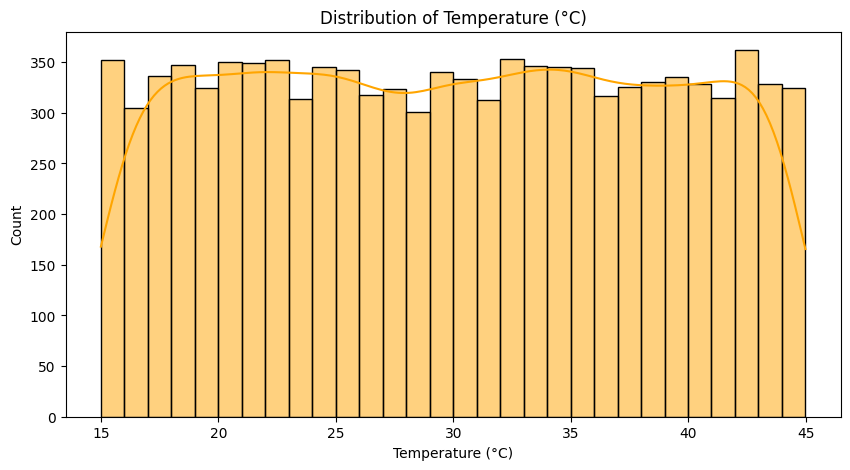

In [130]:
# Temperature Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Temperature (°C)'], kde=True, bins=30, color='orange')
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.savefig('Distribution of Temperature (°C)')
plt.show()

There is a uniform temperature distribution across the range. Most temperatures recorded fall between 15°C and 45°C, with the count for most bins hovering between 300 and 350. There are no extreme peaks or long tails, suggesting a fairly even spread of temperature occurrences across the dataset

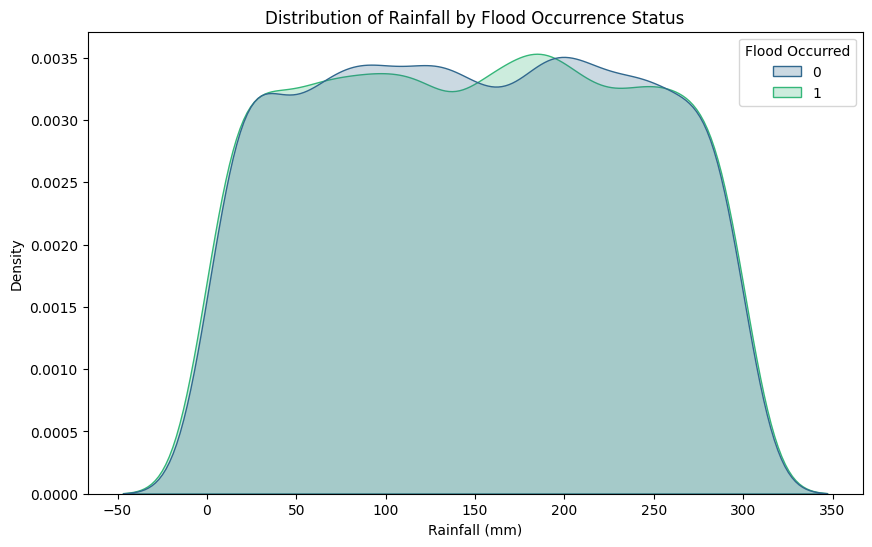

In [133]:
plt.figure(figsize=(10, 6))
# Use Kernel Density Estimate plot to show distribution shape
sns.kdeplot(data=df, x='Rainfall (mm)', hue='Flood Occurred', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of Rainfall by Flood Occurrence Status')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.savefig('Rainfall by Flood Occurrence Status')
plt.show()

The distributions for "no flood" and "flood occurred" overlap significantly.
This suggests that while rainfall is a factor, high rainfall alone does not perfectly determine if a flood will happen in this dataset. Both flood and non-flood events occur across a wide range of rainfall values roughly 0 mm to 300 mm, indicating that there are other factors like Water Level, Soil Type, or River Discharge that are seriouse determinants.

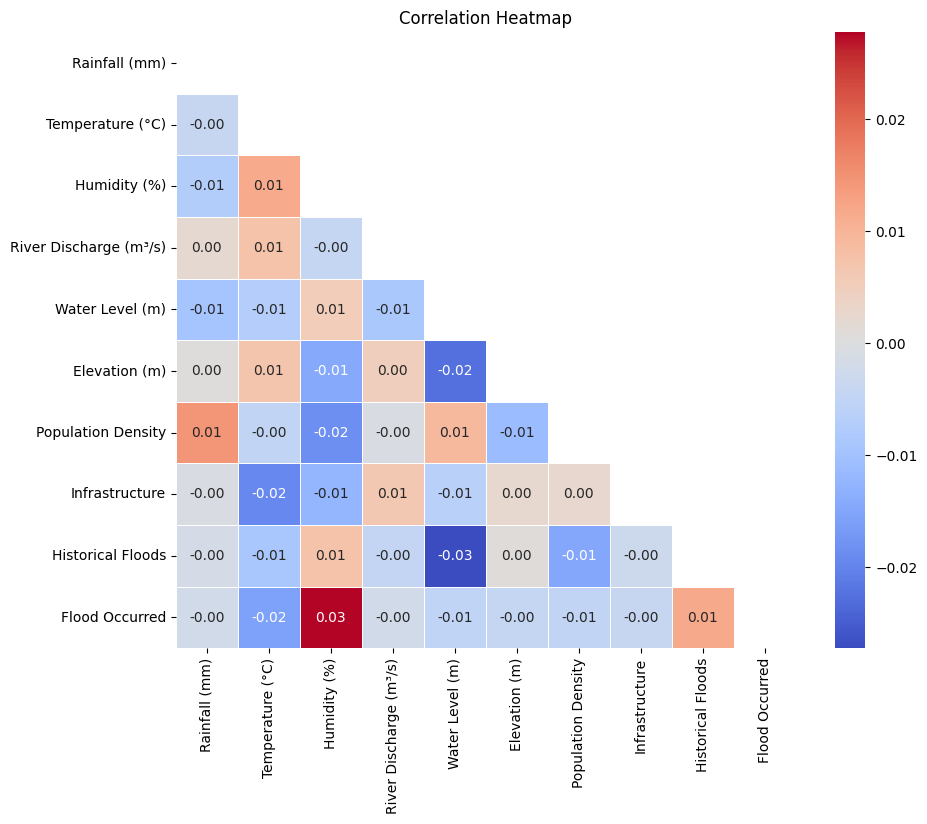

In [136]:
# Select only the numerical columns for the correlation matrix
numerical_features = ['Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 'River Discharge (m³/s)', 
                      'Water Level (m)', 'Elevation (m)', 'Population Density', 
                      'Infrastructure', 'Historical Floods', 'Flood Occurred']

corr_matrix = df[numerical_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap')
plt.show()

* Neutral Relationship (Very Weak or No Link)
These factors have a correlation value near zero, meaning that changes in these columns have almost no linear association with whether a flood happens:
Rainfall, River Discharge, Elevation, and Infrastructure.

* Positive Relationship (More of this means more likely a flood)
When these values go up, the chance of a flood slightly increases:
Humidity, and Historical Floods.

* Negative Relationship (More of this means less likely a flood)
When these values go up, the chance of a flood slightly decreases:
Temperature, Water Level, and Population Density

In [140]:
df

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465434,Water Body,Clay,7276.742184,1.0,0.0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0.0,1.0,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1.0,1.0,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1.0,1.0,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0.0,0.0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1.0,0.0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1.0,0.0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1.0,0.0,1


In [142]:
# Encode categorical
le_land = LabelEncoder()
le_soil = LabelEncoder()
df['Land Cover'] = le_land.fit_transform(df['Land Cover'])
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])

# Features & target
X = df.drop(['Latitude', 'Longitude', 'Flood Occurred'], axis=1)
y = df['Flood Occurred']

In [144]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [147]:
# Gradient Boosting 
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.5165
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       966
           1       0.53      0.50      0.52      1034

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000

[[513 453]
 [514 520]]


This output summarizes the performance of a Gradient Boosting machine learning model used for a binary classification task (predicting one of two outcomes, labeled '0' and '1').
The results indicate that the model is performing only slightly better than random guessing.
Here is a brief explanation of the key metrics:
1. Overall Accuracy: ~51.7% to 52%
Gradient Boosting Accuracy: 0.5165
accuracy 0.52
The model correctly predicted the outcome about 52% of the time on the test dataset of 2000 samples.
In a binary classification task, where simply guessing randomly would yield an accuracy of 50%, this result suggests the model is very weak. It has found some minor patterns but is not a reliable predictor.
2. The Classification Report (Per-Class Metrics)
The table breaks down how well the model performed for each specific class ('0' and '1').
Metric	Class 0 (Negative Class)	Class 1 (Positive Class)
Precision	50%	53%
Recall	53%	50%
F1-Score	51%	52%
Support	966 samples	1034 samples
Support: This shows the actual number of samples in the test set for each class (966 of Class 0, 1034 of Class 1). The dataset is relatively balanced.
Precision: Out of all instances where the model predicted this class, how many were correct? (For Class 0, 50% were correct; for Class 1, 53% were correct).
Recall (Sensitivity): Out of all the times this class actually occurred in the data, how many did the model find? (For Class 0, it found 53%; for Class 1, it found 50%).
F1-Score: A balance between precision and recall. Both classes have F1-scores around 51-52%.
3. Averages
macro avg and weighted avg: Since the support (sample counts) for Class 0 and Class 1 are almost identical, both averages are nearly 52%.
Summary
The model has a very low predictive power. It struggles equally with identifying both Class 0 and Class 1, achieving results that are barely better than chance.
In practical terms, this model is not useful and would require significant adjustments, better features, or a different modeling approach to improve its performance.



In [150]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.512
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       966
           1       0.53      0.52      0.52      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

[[487 479]
 [497 537]]


This output summarizes the performance of a Random Forest classification model, which, similar to the previous Gradient Boosting model, is performing barely above a random guess.
Here is a brief explanation of the key metrics:
1. Overall Accuracy: ~51.2%
Random Forest Accuracy: 0.512
accuracy 0.51
The model correctly predicted the outcome only about 51.2% of the time across the 2000 test samples.
Since a 50% accuracy rate is expected from pure random guessing in a balanced binary classification problem, this model has extremely low predictive power.
2. The Classification Report (Per-Class Metrics)
The table provides a detailed breakdown of performance for each specific class ('0' and '1').
Metric	Class 0 (Negative Class)	Class 1 (Positive Class)
Precision	49%	53%
Recall	50%	52%
F1-Score	50%	52%
Support	966 samples	1034 samples
Support: The dataset is well-balanced, with a nearly even split of 966 instances of Class 0 and 1034 instances of Class 1 in the test set.
Precision & Recall: The scores for both classes are hovering right around 50%.
For Class 0, the model is slightly less precise and recalls half the instances.
For Class 1, the model is slightly more precise (53% of its Class 1 predictions were correct) and recalls just over half the instances (52%).
F1-Score: The balanced F1-scores of 50% and 52% reinforce the idea that the model struggles to robustly identify either class.
3. Averages
macro avg and weighted avg: Both averages are 51%, reflecting the overall mediocre performance across the balanced dataset.
Summary
The Random Forest model is ineffective for this specific task. Its performance is only marginally better than a coin flip, indicating it has not learned meaningful patterns from the provided features.
Both this Random Forest model and your previous Gradient Boosting model are very weak and suggest that you may need to engineer better features, collect more data, or try a different modeling approach entirely.



**HYPERPARAMETER TUNING**

Since both models aren't performing well, we have fine-tune them to get better results.

In [156]:
# Proper train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
# stratify=y is used to ensures that the training and testing sets maintain the same proportion of classes as the original dataset. 
#It will help create a balance btw the training and test

In [160]:
gb = GradientBoostingClassifier(
    n_estimators=600,        # More trees
    learning_rate=0.05,      # Lower learning rate equals better generalization
    max_depth=5,             # Slightly deeper from the initial 4 we had
    min_samples_split=5,     # The minimum number of samples required to split an internal node further
    min_samples_leaf=2,      # The minimum number of samples required to be present at a leaf node (an end node that makes a final prediction) 
                             # after a split occurs
    subsample=0.85,          # This specifies the fraction of the training data used to train each individual tree. 
                             # The data is randomly sampled without replacement for each new tree.
    random_state=42,
    warm_start=False 
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.5153333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1483
           1       0.52      0.53      0.52      1517

    accuracy                           0.52      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.52      0.52      0.52      3000

[[749 734]
 [720 797]]


In [89]:
rf = RandomForestClassifier(
    n_estimators=1000,           # More trees = more stable
    max_depth=15,               # Prevent overfitting while allowing depth
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',        # Default, but explicitly set
    bootstrap=True,
    oob_score=True,             # Out-of-bag score for validation
    class_weight='balanced',    # Extra safety (though data is balanced)
    random_state=42,
    n_jobs=-1                   # Use all CPU cores (faster training)
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.5123333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1483
           1       0.52      0.54      0.53      1517

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000


Confusion Matrix:
[[725 758]
 [705 812]]


In [170]:
# Check if the model can learn ANYTHING from the data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

print("Feature Importances:")
importances = rf.feature_importances_
feat_names = X.columns
for i in zip(feat_names, importances):
    print(f"{i[0]:30}: {i[1]:.3f}")


print("\nMax importance:", max(importances))

#If the highest importance is < 0.12–0.15 → the dataset has no real signal.
#(Real datasets have at least one feature > 0.25–0.50)

Feature Importances:
Rainfall (mm)                 : 0.125
Temperature (°C)              : 0.126
Humidity (%)                  : 0.127
River Discharge (m³/s)        : 0.127
Water Level (m)               : 0.128
Elevation (m)                 : 0.125
Land Cover                    : 0.042
Soil Type                     : 0.044
Population Density            : 0.124
Infrastructure                : 0.017
Historical Floods             : 0.016

Max importance: 0.12763758199791947


In [172]:
# Check how much the target actually correlates with features
print(df.corr()['Flood Occurred'].sort_values(ascending=False))

Flood Occurred            1.000000
Humidity (%)              0.027754
Historical Floods         0.011833
River Discharge (m³/s)   -0.002115
Rainfall (mm)            -0.002170
Latitude                 -0.002908
Infrastructure           -0.004048
Elevation (m)            -0.004331
Population Density       -0.005007
Water Level (m)          -0.005190
Soil Type                -0.006313
Longitude                -0.015008
Temperature (°C)         -0.015771
Land Cover               -0.019941
Name: Flood Occurred, dtype: float64
